In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from fibheap import FibonacciHeap as FibHeap
from peel_by_motif import *
import random
import pandas as pd
from datetime import datetime
from compare_algs.greedy_algorithms import *
import graph_tool.all as gt

import dwave_networkx as dnx
import dimod
plt.rcParams.update({'font.size': 14})
sampler = dimod.SimulatedAnnealingSampler()

In [19]:
df = pd.read_csv('data/soc-sign-bitcoinalpha.csv', names=['source','sink','rate','time'])
G = nx.from_pandas_edgelist(df, 'source', 'sink',['rate'])
largest_cc = max(nx.connected_components(G), key=len)
G = G.subgraph(largest_cc)

In [33]:
triangle_sub = nx.Graph([(1,2),(2,3),(1,3)])
square_sub = nx.Graph([(1,2),(2,3),(3,0),(0,1)])

start=datetime.now()

ismags1 = nx.isomorphism.ISMAGS(G, triangle_sub)
ismags2 = nx.isomorphism.ISMAGS(G, square_sub)
it = ismags1.find_isomorphisms()
cycls_3 = [list(dic.keys()) for dic in it]
it = ismags2.find_isomorphisms()
cycls_4 = [list(dic.keys()) for dic in it]

print(datetime.now()-start)


0:07:02.758811


In [21]:
cut = dnx.maximum_cut(G, sampler)
cutsize = nx.cut_size(G, cut)
cutsize, len(G.edges), cutsize/len(G.edges)

(9833, 14120, 0.6963881019830028)

In [34]:
node_d, fibheap = init_heap_and_dict([(cycls_4,1), (cycls_3,-1)])
results = peel_by_motif(node_d, fibheap, [(cycls_4,1), (cycls_3,-1)], 1, False)
H = G.subgraph(results[1])

In [35]:
cut = dnx.maximum_cut(H, sampler)
cutsize = nx.cut_size(H, cut)
cutsize, len(G.edges), cutsize/len(G.edges)

(1924, 14120, 0.13626062322946175)

In [36]:
node_d, fibheap = init_heap_and_dict([(cycls_4,1), (cycls_3,-0.1)])
results = peel_by_motif(node_d, fibheap, [(cycls_4,1), (cycls_3,-1)], 1, False)
H = G.subgraph(results[1])
cut = dnx.maximum_cut(H, sampler)
cutsize = nx.cut_size(H, cut)
cutsize, len(G.edges), cutsize/len(G.edges)

(1938, 14120, 0.13725212464589234)

In [37]:
node_d, fibheap = init_heap_and_dict([(cycls_4,1), (cycls_3,-10)])
results = peel_by_motif(node_d, fibheap, [(cycls_4,1), (cycls_3,-1)], 1, False)
H = G.subgraph(results[1])
cut = dnx.maximum_cut(H, sampler)
cutsize = nx.cut_size(H, cut)
cutsize, len(G.edges), cutsize/len(G.edges)

(8429, 14120, 0.5969546742209632)

In [7]:
result = []
syn_res= []
for i in range(5):
    tresult = []
    tsyn_res = []
    for p in [0.1, 0.2, 0.4, 0.6]:
        q=0.1
        synG = nx.algorithms.bipartite.generators.random_graph(50, 50, p)
        for i in range(100, 200):
            synG.add_node(i)
            for j in range(100):
                if random.uniform(0,1)<0.01:
                    synG.add_edge(i,j)

        for i in range(100, 200):
            for j in range(i+1, 200):
                if random.uniform(0,1)<q:
                    synG.add_edge(i,j)

        cut = dnx.maximum_cut(synG, sampler)
        cutsize = nx.cut_size(synG, cut)
        tsyn_res.append(cutsize/len(synG.edges))
        triangle_sub = nx.Graph([(1,2),(2,3),(1,3)])
        square_sub = nx.Graph([(1,2),(2,3),(3,0),(0,1)])

        ismags1 = nx.isomorphism.ISMAGS(synG, triangle_sub)
        ismags2 = nx.isomorphism.ISMAGS(synG, square_sub)
        it = ismags1.find_isomorphisms()
        cycls_3 = [list(dic.keys()) for dic in it]
        it = ismags2.find_isomorphisms()
        cycls_4 = [list(dic.keys()) for dic in it]
        node_d, fibheap = init_heap_and_dict([(cycls_4,1), (cycls_3,-1)])
        results = peel_by_motif(node_d, fibheap, [(cycls_4,1), (cycls_3,-1)], 1, False)
        H = synG.subgraph(results[1])
        cut = dnx.maximum_cut(H, sampler)
        cutsize = nx.cut_size(H, cut)
        print(cutsize/len(H.edges))
        tresult.append(cutsize/len(H.edges))
    result.append(tresult)
    syn_res.append(tsyn_res)

0.4316877152698048
0.44802867383512546
0.6515723270440251
0.7387254901960785
0.31776765375854216
0.3893058161350844
0.6467181467181468
0.7249143416544298
0.37668711656441717
0.4326568265682657
0.625615763546798
0.7156353330184223
0.3784431137724551
0.3879728419010669
0.6204107031736155
0.7028487229862476
0.3841676367869616
0.44314079422382674
0.6182965299684543
0.7274463007159905


In [9]:
cut = dnx.maximum_cut(H, sampler)
cutsize = nx.cut_size(H, cut)

In [11]:
cutsize, len(H.edges)

(1524, 1524)

In [12]:
print(syn_res)
print(result)

[[0.7944890929965557, 0.839605734767025, 0.9006289308176101, 0.9269607843137255], [0.7790432801822323, 0.8255159474671669, 0.8976833976833977, 0.9202153695545766], [0.7865030674846626, 0.8339483394833949, 0.8842364532019704, 0.9126121870571563], [0.7940119760479042, 0.8370514064015518, 0.8867454884878656, 0.9081532416502947], [0.7823050058207218, 0.8402527075812274, 0.8826498422712934, 0.9183770883054893]]
[[0.734375, 1.0, 1.0, 1.0], [0.7246753246753247, 1.0, 1.0, 1.0], [0.7379807692307693, 1.0, 1.0, 1.0], [0.7247706422018348, 1.0, 1.0, 1.0], [0.7205240174672489, 1.0, 1.0, 1.0]]


In [2]:
syn_res = [0.7863046044864227, 0.8389261744966443, 0.8911521323997453, 0.9128769746290091]
result = [0.7799511002444988, 1.0, 1.0, 1.0]


In [14]:
np.mean(result, axis=0)

array([0.72846515, 1.        , 1.        , 1.        ])

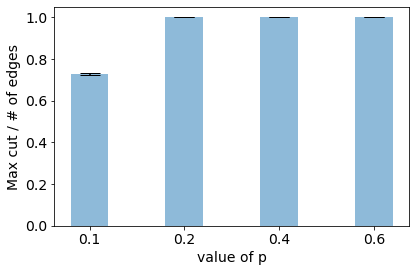

In [23]:

mean = np.mean(result, axis=0)
labels= [0.1, 0.2, 0.4, 0.6]
std = np.std(result, axis=0)
x_pos = np.arange((4))
fig, ax = plt.subplots()
ax.bar(x_pos, mean,
       yerr=std,
       align='center',
       alpha=0.5,
       ecolor='black', width=0.4,
       capsize=10)
ax.set_xlabel('value of p')
plt.ylabel('Max cut / # of edges')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
# ax.set_title('Coefficent of Thermal Expansion (CTE) of Three Metals')
# ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('figs/synthetic/bar_plot_with_error_bars.png')
plt.show()

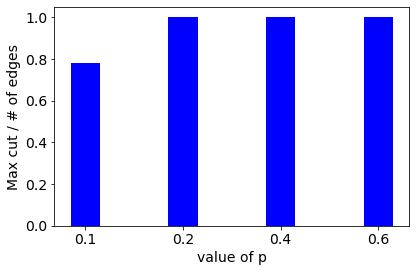

In [4]:
# for i in range(len(result)):
x = [i for i in range(4)]
# plt.bar(np.array(x)-0.15, syn_res, width = 0.3, color='r')
plt.bar(np.array(x), result, width = 0.3, color='b')
#setting the xticks. Note x1 and x2 are tuples, thus + is concatenation
plt.xticks(range(4), [0.1, 0.2, 0.4, 0.6]) 
plt.xlabel('value of p')
plt.ylabel('Max cut / # of edges')
# colors = {'original':'red', 'contrasted':'blue'}         
# labels = list(colors.keys())
# handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
# plt.legend(handles, labels, loc='lower right')
plt.tight_layout()
plt.savefig('figs/synthetic/near_bipartite.png')
plt.show()

In [23]:
print(syn_res)
print(result)

[0.7863046044864227, 0.8389261744966443, 0.8911521323997453, 0.9128769746290091]
[0.7799511002444988, 1.0, 1.0, 1.0]


In [8]:
result = []
syn_res= []
for p in [0.1, 0.2, 0.4, 0.05]:
    synG = nx.erdos_renyi_graph(200, p)
    cut = dnx.maximum_cut(synG, sampler)
    cutsize = nx.cut_size(synG, cut)
    syn_res.append(cutsize/len(synG.edges))
#     for i in range(100, 200):
#         synG.add_node(i)
#         for j in range(100):
#             if random.uniform(0,1)<0.01:
#                 synG.add_edge(i,j)

#     for i in range(100, 200):
#         for j in range(i+1, 200):
#             if random.uniform(0,1)<q:
#                 synG.add_edge(i,j)
    triangle_sub = nx.Graph([(1,2),(2,3),(1,3)])
    square_sub = nx.Graph([(1,2),(2,3),(3,0),(0,1)])

    ismags1 = nx.isomorphism.ISMAGS(synG, triangle_sub)
    ismags2 = nx.isomorphism.ISMAGS(synG, square_sub)
    it = ismags1.find_isomorphisms()
    cycls_3 = [list(dic.keys()) for dic in it]
    it = ismags2.find_isomorphisms()
    cycls_4 = [list(dic.keys()) for dic in it]
    node_d, fibheap = init_heap_and_dict([(cycls_4,1), (cycls_3,-1)])
    results = peel_by_motif(node_d, fibheap, [(cycls_4,1), (cycls_3,-1)], 1, False)
    H = synG.subgraph(results[1])
    cut = dnx.maximum_cut(H, sampler)
    cutsize = nx.cut_size(H, cut)
    print(cutsize/len(synG.edges))
    result.append(cutsize/len(H.edges))

0.650253807106599
0.6031312127236581


KeyboardInterrupt: 

In [48]:
cut = dnx.maximum_cut(synG, sampler)
cutsize = nx.cut_size(synG, cut)
cutsize, len(synG.edges), cutsize/len(synG.edges)

(312, 358, 0.8715083798882681)

In [49]:
node_d, fibheap = init_heap_and_dict([(cycls_4,1), (cycls_3,-1)])
results = peel_by_motif(node_d, fibheap, [(cycls_4,1), (cycls_3,-1)], 1, False)
H = synG.subgraph(results[1])
cut = dnx.maximum_cut(H, sampler)
cutsize = nx.cut_size(H, cut)
cutsize, len(H.edges), cutsize/len(H.edges)

(131, 131, 1.0)

In [52]:
cut

{0,
 1,
 2,
 4,
 5,
 6,
 7,
 9,
 10,
 11,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 69,
 94}

In [57]:
synG = nx.algorithms.bipartite.generators.random_graph(30, 30, 0.2)
for i in range(60, 120):
    synG.add_node(i)
    for j in range(60):
        if random.uniform(0,1)<0.02:
            synG.add_edge(i,j)
            
for i in range(60, 120):
    for j in range(i+1, 120):
        if random.uniform(0,1)<0.15:
            synG.add_edge(i,j)

In [58]:
triangle_sub = nx.Graph([(1,2),(2,3),(1,3)])
square_sub = nx.Graph([(1,2),(2,3),(3,0),(0,1)])

start=datetime.now()

ismags1 = nx.isomorphism.ISMAGS(synG, triangle_sub)
ismags2 = nx.isomorphism.ISMAGS(synG, square_sub)
it = ismags1.find_isomorphisms()
cycls_3 = [list(dic.keys()) for dic in it]
it = ismags2.find_isomorphisms()
cycls_4 = [list(dic.keys()) for dic in it]

print(datetime.now()-start)

0:00:00.321991


In [59]:
cut = dnx.maximum_cut(synG, sampler)
cutsize = nx.cut_size(synG, cut)
cutsize, len(synG.edges), cutsize/len(synG.edges)

(409, 517, 0.7911025145067698)

In [60]:
node_d, fibheap = init_heap_and_dict([(cycls_4,1), (cycls_3,-1)])
results = peel_by_motif(node_d, fibheap, [(cycls_4,1), (cycls_3,-1)], 1, False)
H = synG.subgraph(results[1])
cut = dnx.maximum_cut(H, sampler)
cutsize = nx.cut_size(H, cut)
cutsize, len(H.edges), cutsize/len(H.edges)

(191, 263, 0.7262357414448669)